In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
from rdkit.Chem.Scaffolds import MurckoScaffold

In [2]:
with open('VDR_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    vdr_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        vdr_ligands.append(mol)

suppl = Chem.SDMolSupplier('cdd2021/data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [11:32:30] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:32:30] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [11:32:30] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:32:30] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:32:30] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [11:32:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:32:30] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [11:32:30] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [11:32:30] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [11:32:30] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [11:32:30] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

RDKit ERROR: [11:32:31] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:32:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [11:32:31] ERROR: Could not sanitize molecule ending on line 503342
RDKit ERROR: [11:32:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [11:32:31] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:32:31] ERROR: Could not sanitize molecule ending on line 508068
RDKit ERROR: [11:32:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:32:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [11:32:31] ERROR: Could not sanitize molecule ending on line 510069
RDKit ERROR: [11:32:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [11:32:31] Can't kekulize mol.  Unkekulized atom

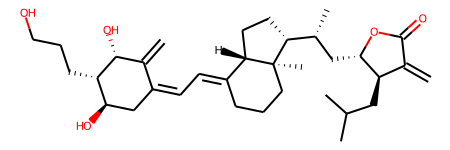

In [3]:
vdr_ligands[0]

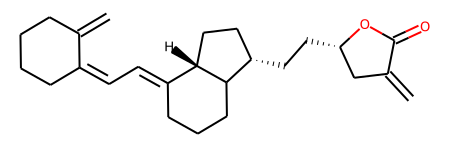

In [5]:
scaffold1 = MurckoScaffold.GetScaffoldForMol(vdr_ligands[0])
scaffold1

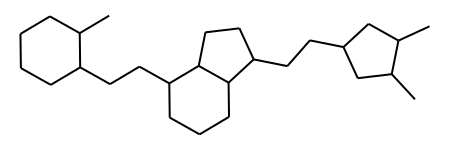

In [6]:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

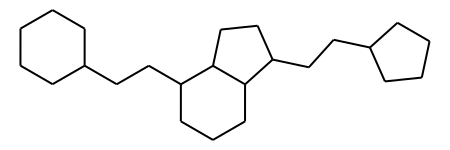

In [7]:
scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

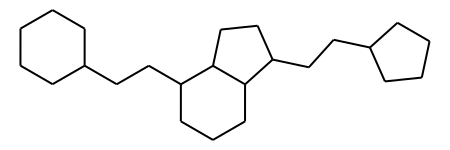

In [9]:
scaffold4 = MurckoScaffold.GetScaffoldForMol(scaffold3)
scaffold4

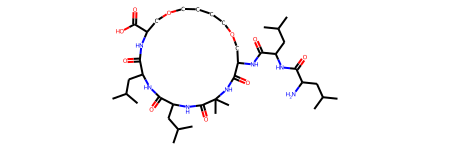

In [53]:
vdr_ligands[99]

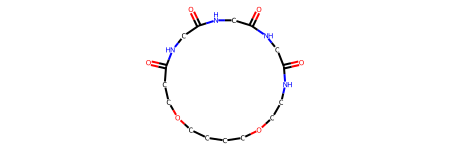

In [54]:
scaffold_1 = MurckoScaffold.GetScaffoldForMol(vdr_ligands[99])
scaffold_1

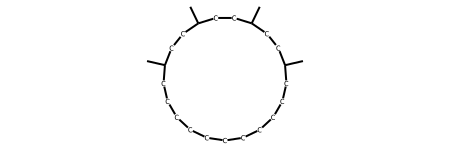

In [64]:
scaffold_2 = MurckoScaffold.MakeScaffoldGeneric(scaffold_1)
scaffold_2

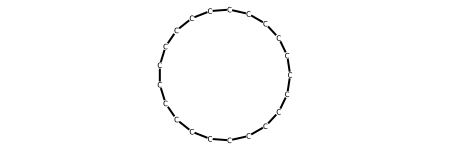

In [65]:
scaffold_3 = MurckoScaffold.GetScaffoldForMol(scaffold_2)
scaffold_3

In [63]:
a = Chem.rdmolops.RemoveStereochemistry(vdr_ligands[99])
a

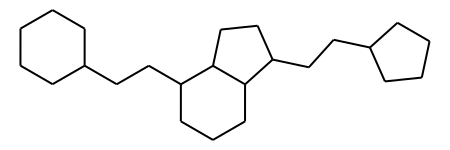

In [56]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
scaffold(vdr_ligands[0])

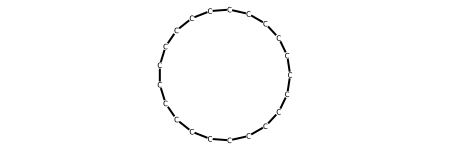

In [57]:
scaffold(vdr_ligands[99])

In [10]:
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

RDKit ERROR: [11:32:33] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [11:35:14] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [11:35:14] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [11:35:14] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [11:35:17] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [11:35:17] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [11:35:18] Explicit valence for atom # 23 C greater than permitted
RDKit ERROR: [11:35:18] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [11:35:19] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [11:35:19] Explicit valence for atom # 40 C, 6, is greater than permitted
RDKit ERROR: [11:35:19] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [11:35:19] Explicit valence for atom # 31

 None,

In [67]:
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
len(drugbank_scaffolds_smiles)

7095

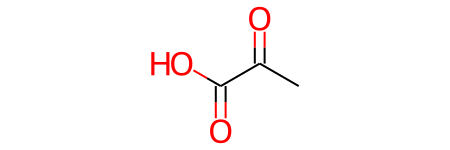

In [13]:
drugs[12]

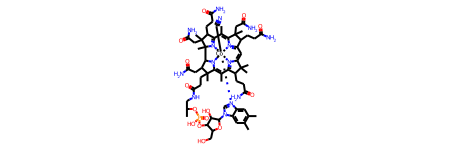

In [15]:
drugs[8]

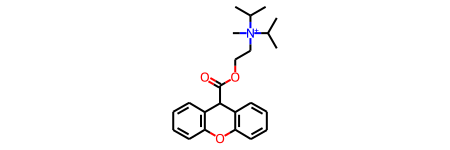

In [68]:
drugs[666]

In [16]:

scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)
scaffolds2drugs


{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [0,
  2059],
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [1,
  529],
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [2, 5, 2324],
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [3,
  4676],
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [4],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [6],
 'C1CCCCC1': [7,
  13,
  27,
  39,
  54,
  56,
  59,
  67,
  72,
  73,
  78,
  81,
  82,
  89,
  102,
  108,
  112,
  123,
  126,
  127,
  131,
  134,
  149,
  154,
  155,
  161,
  171,
  181,
  192,
  196,
  198,
  202,
  206,
  224,
  228,
  234,
  257,
  258,
  268,
  276,
  285,
  305,
  306,
  310,
  315,
  318,
  333,
  336,
  346,
  350,
  361,
  370,
  375,
  376,
  378,
  381,
  386,
  408,
  416,
  429,
  430,
  435,
  443,
  459,
  477,
  479,
  484,
  494,
  495,
  497,
  512,
  514,

In [69]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:20]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57),
  ('C1CCC2CCCC2C1', 192),
  ('C1CCC(CC2CCCC2)CC1', 74),
  ('C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 17),
  ('C1CCC2CCCCC2C1', 169),
  ('C1CCC(C2CCCCC2C2CCCC2)CC1', 1)])

In [70]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

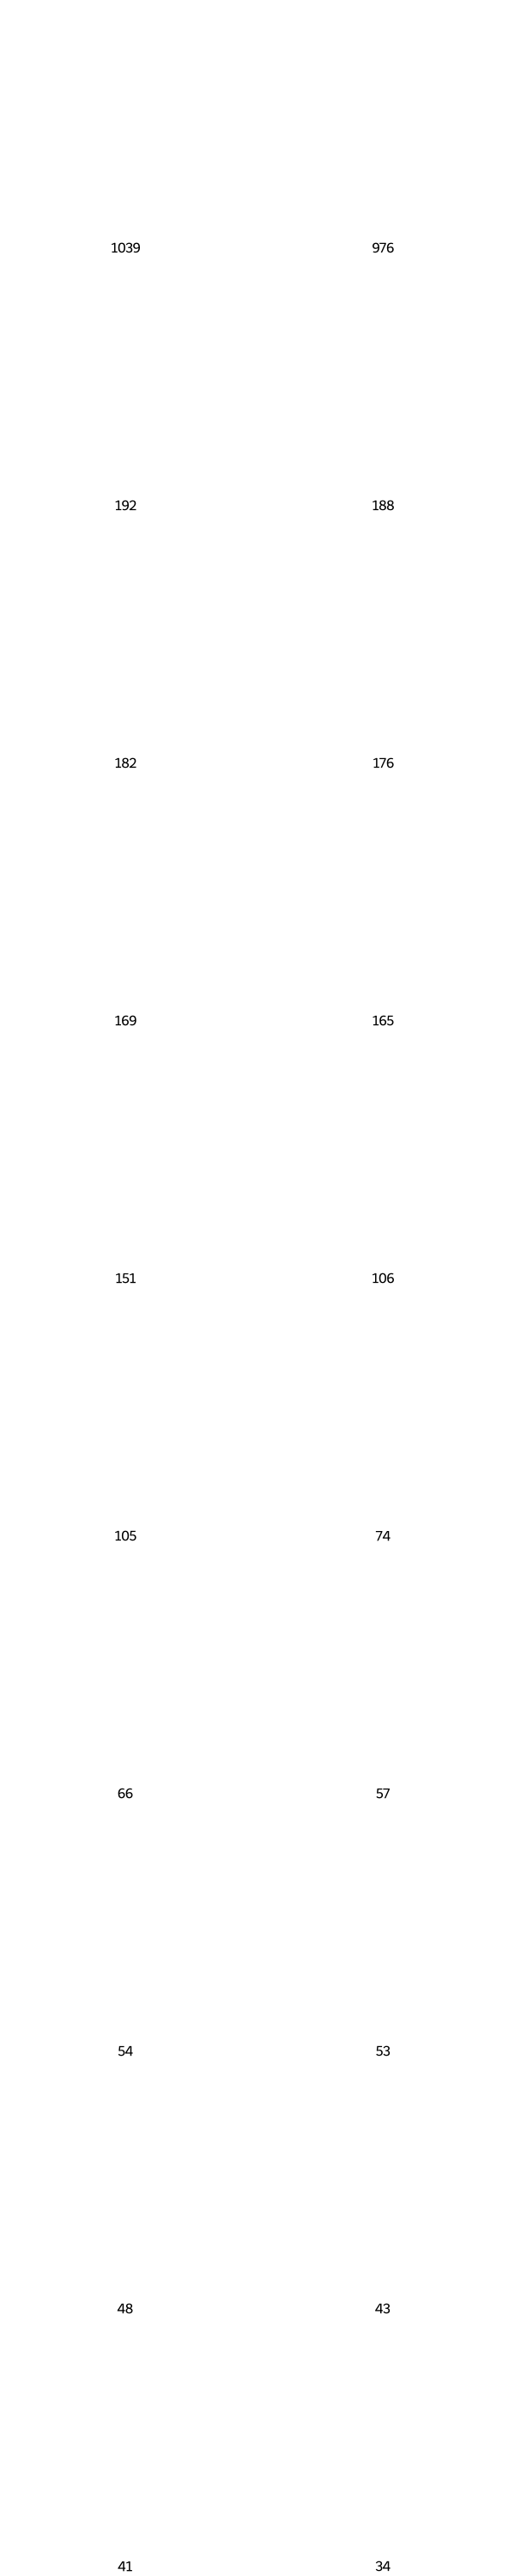

In [71]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:20]])
#nevim proc mi to nic nevykresluje

In [40]:
vdr_scaffolds_smiles = [(i, Chem.MolToSmiles(scaffold(ligand))) for i, ligand in enumerate(vdr_ligands)]
vdr_scaffolds_smiles[:20]

[(0, 'C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1'),
 (1, 'C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1'),
 (2, 'C1CCC2C(C1)CCC1C3CCCC3CCC21'),
 (3, 'C1CCC(CCC2CCCC3CCCC32)CC1'),
 (4, 'C1CCC(CCC2CCCC3CCCC32)CC1'),
 (5, 'C1CCC(CCC2CCCC3CCCC32)CC1'),
 (6, 'C1CCC2C(C1)CCC1C3CCCC3CCC21'),
 (7, 'C1CCCCCCCCCCCCCCCCCCCC1'),
 (8, 'C1CCC(CCC2CCC(C3CCCCC3)C2)CC1'),
 (9, 'C1CCC(CCC2CCCC3CCCC32)CC1'),
 (10, 'C1CCC(CC(C2CCCCC2)C2CCC3CCCCC32)CC1'),
 (11, 'C1CCC(CC(C2CCCCC2)C2CCC3CCCCC32)CC1'),
 (12, 'C1CCC(CC(C2CCCCC2)C2CCC3CCCCC32)CC1'),
 (13, 'C1CCC(CC(C2CCCCC2)C2CCC3CCCCC32)CC1'),
 (14, 'C1CCC(CCC2CCCC3C(CCCCCC45CC6CC(CC(C6)C4)C5)CCC23)CC1'),
 (15, 'C1CCC(CCC2CCCC2CCC2CCC3C(CCC4CCCCC4)CCCC23)CC1'),
 (16, 'C1CCC2C(C1)CCC1C3CCCC3CCC21'),
 (17, 'C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1'),
 (18, 'C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1'),
 (19, 'C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1')]

In [41]:
scaffolds2ligands = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in vdr_scaffolds_smiles}
for ligand_idx, scaffoldsmiles in vdr_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(ligand_idx)
scaffolds2ligands

{'C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1': [0,
  1,
  17,
  18,
  19,
  41,
  47,
  72,
  79,
  81,
  82,
  83,
  86,
  92,
  93,
  94,
  95,
  96,
  98,
  104,
  105,
  108,
  111,
  113,
  114,
  116,
  123,
  127,
  150,
  151,
  152,
  153,
  154,
  155,
  163,
  164,
  165,
  192,
  193,
  207,
  208,
  211,
  214,
  219,
  220,
  225,
  229,
  233,
  269,
  277,
  287,
  288,
  289,
  290,
  291,
  292,
  293,
  294,
  296,
  297,
  305,
  306,
  308,
  314,
  338,
  339,
  342,
  343,
  344,
  353,
  354,
  379,
  381,
  388,
  399,
  403,
  404,
  425,
  430,
  432,
  433,
  438,
  439,
  443,
  444,
  446,
  451,
  476,
  477,
  478,
  481,
  503,
  513,
  517,
  522,
  529,
  618,
  619],
 'C1CCC2C(C1)CCC1C3CCCC3CCC21': [2,
  6,
  16,
  25,
  29,
  30,
  31,
  35,
  69,
  76,
  88,
  90,
  216,
  235,
  238,
  263,
  389,
  410,
  411,
  412,
  533,
  534,
  538,
  539,
  600,
  601,
  615,
  632],
 'C1CCC(CCC2CCCC3CCCC32)CC1': [3,
  4,
  5,
  9,
  27,
  28,
  37,
  51,
  53,
 

In [42]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount

(83,
 [('C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1', 98),
  ('C1CCC(CC(C2CCCCC2)C2CCC3CCCCC32)CC1', 87),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 69),
  ('C1CCC(CCC2CCC(C3CCCCC3)C2)CC1', 60),
  ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 28),
  ('C1CCC(CC2CCCC2)CC1', 26),
  ('C1CCC2CCCCC2CC1', 23),
  ('C1CCC(CCC2CCCC3C(CCC4CCCC4CC4CCCCC4)CCC23)CC1', 16),
  ('C1CCC(CCC2CC3CCCCC3C2)CC1', 14),
  ('C1CCC(CCC2CCCC3C(CCCCCC45CC6CC(CC(C6)C4)C5)CCC23)CC1', 12),
  ('C1CCC(CCCCC2CCC(C3CCCCC3)CC2)CC1', 11),
  ('C(CCCC1CCCCC1)CCC1CCCCC1', 10),
  ('C1CCC(CCC2CCCC2CCC2CCC3C(CCC4CCCCC4)CCCC23)CC1', 9),
  ('C1CCC(CCC(C2CCCCC2)C2CCC3CCCCC32)CC1', 8),
  ('C1CCC(CCCCCC2CCC3C(CCC4CCCCC4)CCCC23)CC1', 8),
  ('C1CCC(CC2CCC(C3CCCC3)C2)CC1', 8),
  ('C1CCC(CC(C2CCCC2)C2CCC3CCCCC32)CC1', 7),
  ('C1CCC(CCCC2CCCC2CCC2CCC3C(CCC4CCCCC4)CCCC23)CC1', 6),
  ('C1CCC(CCC2CCCC3C(CCCCCCC45CC6CC(CC(C6)C4)C5)CCC23)CC1', 6),
  ('C1CCC(CCCCCC2CCC(C3CCCCC3)CC2)CC1', 6),
  ('C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCCCC1', 6),
  ('C1CCC(CCCCC2CCCC2CCC2CCC3C(CCC4CCCC

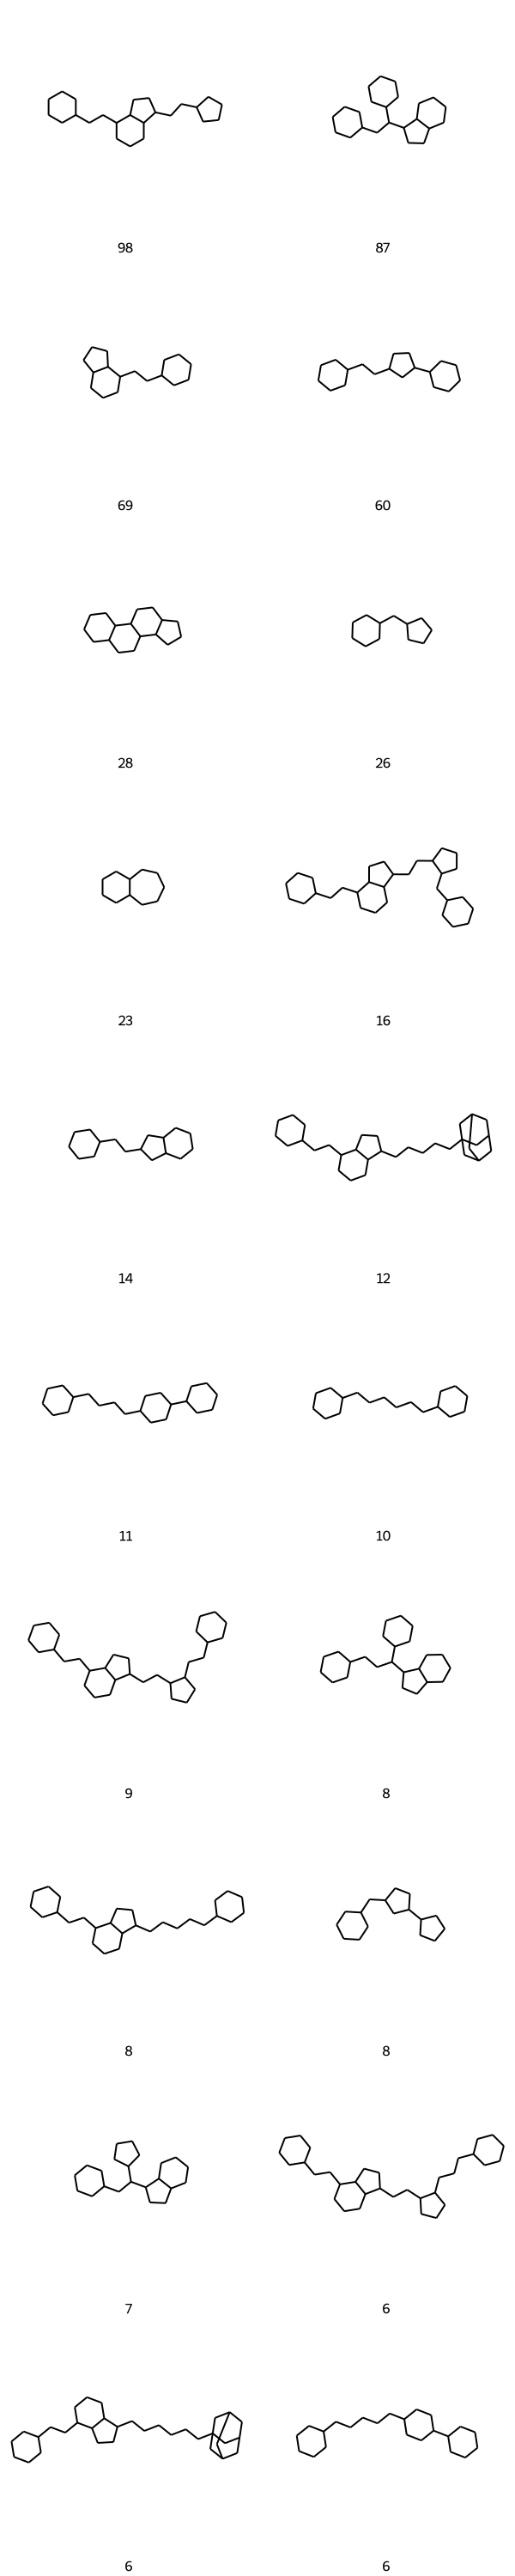

In [43]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

In [46]:
scaffold_representatives = {}
for scaffold, ligands in scaffolds2ligands.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: vdr_ligands[x].GetProp('pChEMBL'),
                                                reverse=True)[0]
len(scaffold_representatives), scaffold_representatives

(83,
 {'C1CCC(CCC2CCCC3C(CCC4CCCC4)CCC23)CC1': 1,
  'C1CCC2C(C1)CCC1C3CCCC3CCC21': 632,
  'C1CCC(CCC2CCCC3CCCC32)CC1': 587,
  'C1CCCCCCCCCCCCCCCCCCCC1': 7,
  'C1CCC(CCC2CCC(C3CCCCC3)C2)CC1': 639,
  'C1CCC(CC(C2CCCCC2)C2CCC3CCCCC32)CC1': 89,
  'C1CCC(CCC2CCCC3C(CCCCCC45CC6CC(CC(C6)C4)C5)CCC23)CC1': 109,
  'C1CCC(CCC2CCCC2CCC2CCC3C(CCC4CCCCC4)CCCC23)CC1': 40,
  'C1CCC(CC2CCCC2)CC1': 256,
  'C1CCC(CC2CCC3C(CCC4C5CCCC5CCC34)C2)CC1': 415,
  'C1CCC(CCCC2CCCC2CCC2CCC3C(CCC4CCCCC4)CCCC23)CC1': 22,
  'C1CCC(CCCCC2CCCC2CCC2CCC3C(CCC4CCCCC4)CCCC23)CC1': 85,
  'C1CCC(CCC(C2CCCCC2)C2CCC3CCCCC32)CC1': 26,
  'C1CCC(CCC2CCCC3C(CCCCCCC45CC6CC(CC(C6)C4)C5)CCC23)CC1': 231,
  'C1CCC2CCCCC2CC1': 461,
  'C1CCC(CCCCCC2CCC3C(CCC4CCCCC4)CCCC23)CC1': 182,
  'C1CCC(CCCCCC23CC4CC(CC(C4)C2)C3)CC1': 43,
  'C(CCCC1CCC2CCCCC12)CCC1CCCCC1': 44,
  'C(CCCC1CCC2CCCCC2C1)CCC1CCCCC1': 45,
  'C1CCC(CCCCC2CCCCC2)CC1': 46,
  'C1CCC(CCC2CCCC3C(CCC4CCCC4CC4CCCCC4)CCC23)CC1': 429,
  'C1CCC(CCCCC2CCC(C3CCCCC3)CC2)CC1': 333,
  'C1

In [48]:
scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_ligandcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = vdr_ligands[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', "#{} | pChEMBL {}".format(str(scaffold_representatives[scaffold]),
                                                            representative_mol.GetProp('pChEMBL')))
    scaffold_representatives4visualization.append(representative_mol)
len(scaffold_representatives4visualization), scaffold_representatives4visualization[:20]

(166,
  <rdkit.Chem.rdchem.Mol at 0x7ff202845c60>])

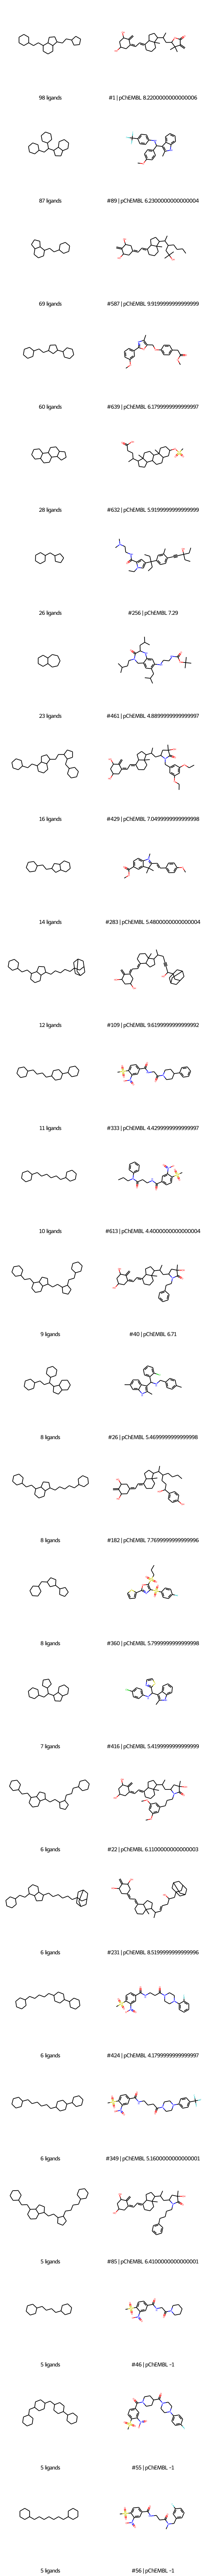

In [49]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:50],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:50]])